### Newton Raphson method: Solution of non linear equations

This example demonstrates the use of Newton Raphson method to solve two non linear equations simultaneously. This method can be used to find optimal of two dimensional data. 

This example also demonstrates the use of **sympy** library to compute derivatives of functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sympy import symbols, Derivative

Declare x1 and x2 as theta  as we would be differentiating functions w.r.t. x1 and x2.

$\mathtt{J}_f(\mathbf{x})$ is the *Jacobian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{J}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}
\end{bmatrix}$$

In [2]:
n_f = 2 #n_f number of functions



theta_arr = ['x1', 'x2']

x1 = np.linspace(-10, 10, 50)
x2 = np.linspace(-10, 10, 50)

def f1(x1, x2):
    return x1*x2 + 2*x2 -2;

def f2(x1, x2):
    return x1**2 + 4*x2**2 - 4;

y1 = f1(x1, x2)
y2 = f2(x1, x2)


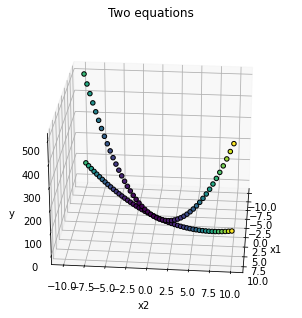

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,y1,edgecolors='black',c=y1,alpha=1)
ax.scatter(x1,x2,y2,edgecolors='black',c=y1,alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.view_init(elev=25, azim=5)
plt.title('Two equations')
plt.show()

In [4]:
# we will use x1 as symbolic representation for derivatives
# we will use x1_n as numberic variable to vector of numberic scalars

x1_n = x1;
x2_n = x2;

# now to compute derivatives we will convert x1 and x2 as symbols
x1, x2 = sy.symbols('x1 x2');


print('f1: ', f1(x1,x2))
print('f2: ', f2(x1,x2))

# Notice that now x1 and x2 are symbols as 'x1' and 'x2'
# rather than numeric values of x1 and x2
# Now we compute derivatitive the symbolic representation which is as an equation

f1:  x1*x2 + 2*x2 - 2
f2:  x1**2 + 4*x2**2 - 4


In [5]:
# using eval function to replace symbols with numeric values for the function df_s
def df_eval(df_s, x1_val, x2_val):
    eval_x1 = df_s.subs(x1, x1_val);
    eval_x2 = eval_x1.subs(x2, x2_val);
    return eval_x2;


In [6]:
# jacobian_s - symbolic jacobian for first order derivatives
# jacobian_n - numeric jacobian 
jacobian_s = np.empty((n_f,n_f), dtype = object)
jacobian_n = np.empty((n_f,n_f), dtype = float)
x0 = np.array([[2.0], [10.1]])
i = 0
print('x1, x2 ', x0[0], x0[1])
while i < n_f:
    j = 0;    
    for theta in theta_arr:  
        function = eval('f'+str(i+1)+'(x1,x2)');
        jacobian_s[i,j] = sy.diff(function, theta);
        print('jacobian_s :',jacobian_s[i,j])
        jacobian_n[i,j] = df_eval(jacobian_s[i,j],x0[0],x0[1])
        print('jacobian_s :',jacobian_n[i,j])
        j = j + 1;  
    i = i + 1;         

x1, x2  [2.] [10.1]
jacobian_s : x2


TypeError: can't convert expression to float

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1_n,x2_n,y1,edgecolors='black',c=y1,alpha=0.5)
ax.scatter(x1_n,x2_n,y2,edgecolors='black',c=y1,alpha=0.5)
ax.plot(x0[0], x0[1],f1(x0[0], x0[1]),'g*', alpha = 1, label='initial f1')
ax.plot(x0[0], x0[1],f2(x0[0], x0[1]),'go', alpha = 1, label='initial f2')


max_iter = 100
i = 0
delta_thresold = .001
 
while i < max_iter:
    f1_val = f1(x0[0], x0[1]);
    f2_val = f2(x0[0], x0[1]);
   
    f = np.array([f1_val,f2_val]);     
    delta_f = np.linalg.inv(jacobian_n) @ f
    if ((abs(delta_f[0]) <= delta_thresold) and (abs(delta_f[1]) <= delta_thresold)):
        break;
    x0 = x0 - delta_f 
    i = i + 1;
    
ax.plot(x0[0], x0[1],f1_val,'b*', alpha = 1, label='converged f1')
ax.plot(x0[0], x0[1],f2_val,'bo', alpha = 1, label='converged f2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
ax.view_init(elev=25, azim=5)
plt.title('Solution of equations')
plt.legend()
plt.show()